In [1]:
from pathlib import Path
import sys

import numpy as np

sys.path.append('..')
from shape_transformers.dataset.nphm_dataset import NPHMDataset
from shape_transformers.dataset.transforms import ShapePositionNormalize, SubsampleShape, Compose

v_mean = np.load('../shape_transformers/dataset/nphm_mean_vertices.npy')
v_std = np.load('../shape_transformers/dataset/nphm_std_vertices.npy')

In [2]:
n_subsample = 5000

norm = ShapePositionNormalize(v_mean, v_std)
subsamp = SubsampleShape(n_subsample)
transform = Compose(norm, subsamp)

In [3]:
data_path = Path('/apollo/datasets/NPHM/')
ds_train = NPHMDataset(data_path, subset='train', transform=transform)

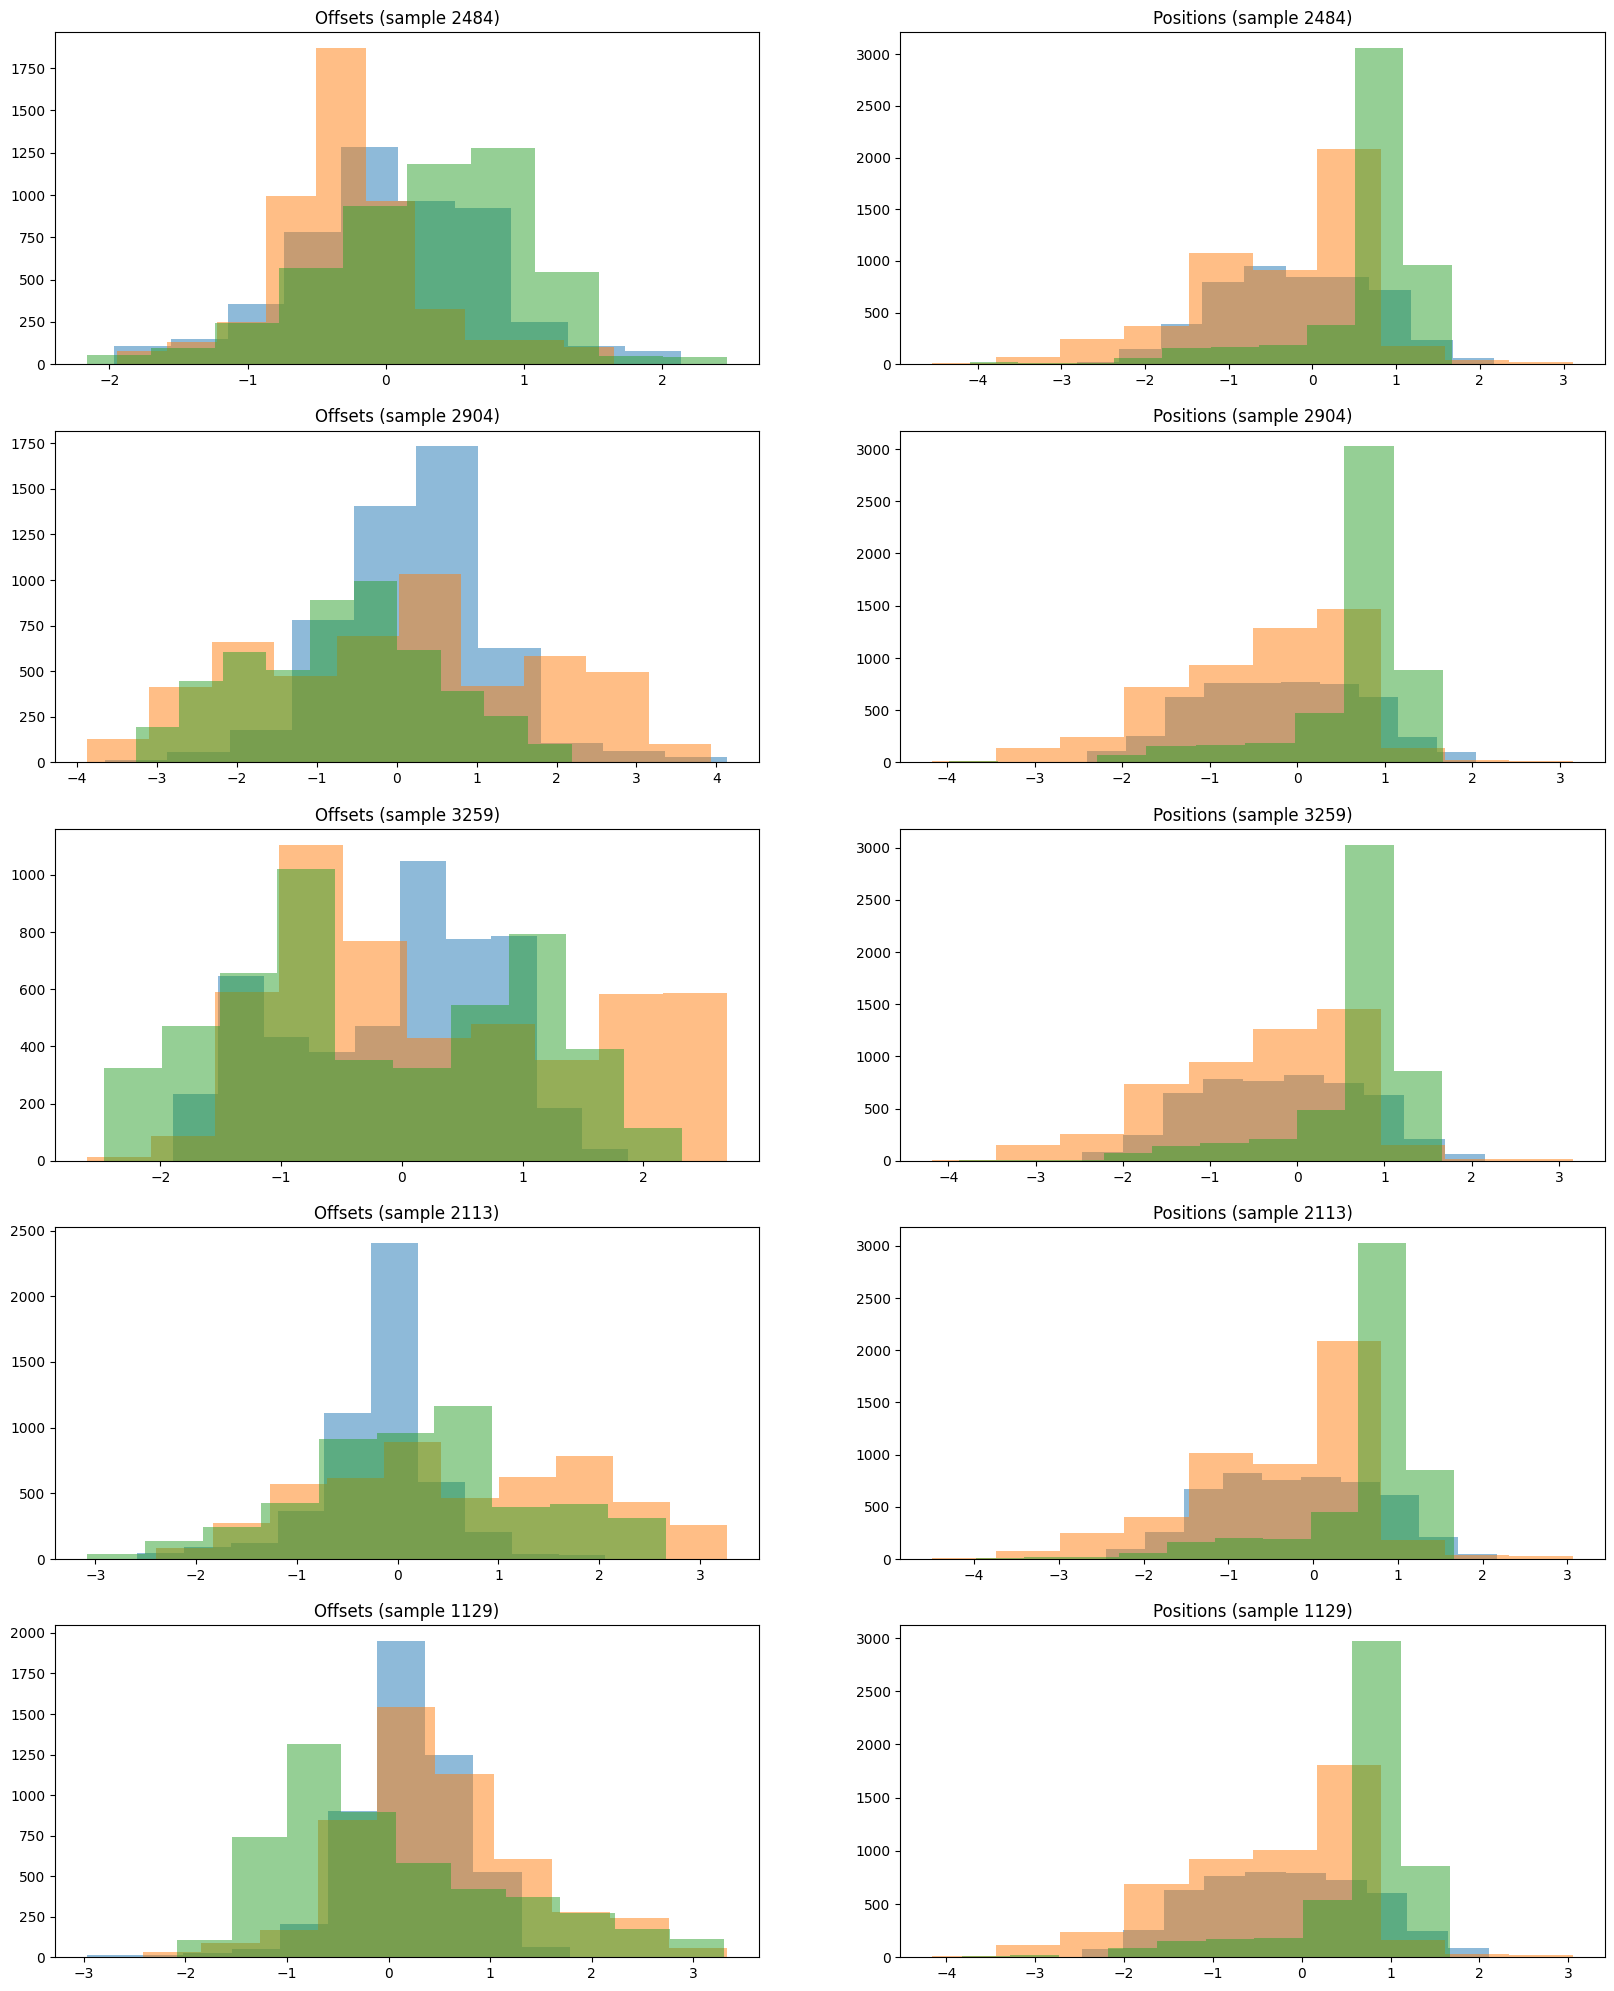

In [4]:
from random import randint
import matplotlib.pyplot as plt

nrows = 5
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(20, 25))

for i in range(nrows):
    j = randint(0, len(ds_train))
    v_off, pos, *_ = ds_train[j]
    subsamp.refresh_vert_idxs()

    for c in v_off.T:
        axes[i][0].set_title(f'Offsets (sample {j})')
        axes[i][0].hist(c, alpha=0.5)

    for c in pos.T:
        axes[i][1].set_title(f'Positions (sample {j})')
        axes[i][1].hist(c, alpha=0.5)